Content Creation Competition in Online Recommender Systems

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random

In [2]:
class Exp3:
    def __init__(self, k, gamma=0.1):
        self.k = k
        self.weights = np.ones(k)
        self.gamma = gamma
        self.probabilities = np.ones(k)
        
    def select_arm(self):
        self.probabilities = (1 - self.gamma) * self.weights / np.sum(self.weights) + self.gamma / self.k
        return np.random.choice(self.k, p=self.probabilities)

    def update(self, arm, reward):
        estimated_reward = 1.0 * reward / self.probabilities[arm]
        #print(estimated_reward)
        self.weights[arm] *= np.exp((self.gamma / self.k) * estimated_reward)

In [3]:
from enum import Enum
class Question(Enum):
    P1 = 1
    P2 = 2
    P3 = 3
    P4 = 4
    P5 = 5

In [56]:

def run_alg(t, k=100, m=100, n=100, question = Question.P1):
    # m creator
    # k content options
    # n users
    # create an array to store the rewards obtained by each player in each round
    rewards = np.zeros((t, m))
    # print(rewards)

    # create an array of m instances of the Exp3 algorithm
    players = [Exp3(k) for i in range(m)]
    players_ind = [i for i in range(m)]

    # create the utility matrix
    utility = np.random.uniform(0,1, (k, n))

    total_welfare = 0
    # run the simulation for t rounds
    for t in range(t):
        # each player selects an arm
        arms = np.array([player.select_arm() for player in players],dtype=int) # size m
        
        if question == Question.P3:
            content_util = np.zeros((n,m))
            for user in range(n):
                content_util[user] = np.exp(np.array([ utility[i,user] for i in arms]))
                content_util[user] = content_util[user]/content_util[user].sum()
         

        # determining user choice

        for user in range(n):
            maxind = []
            max = 0
            if question != Question.P3:
                for player in range(m):
                    util = utility[arms[player], user]
                    #if the player gives the most utility for the user, save them
                    if max < util:
                        max = util
                        maxind = [player]
                    elif max==util:
                        maxind.append(player)
                        
            else:
                # print("content choice prob: ", content_util[user])
                maxind.append(int(np.random.choice(players_ind, p = content_util[user])))
                # print("maxind: ", maxind)
                max = utility[maxind[-1], user]
                # print("max: ", max)

            match(question):
                case Question.P1:  
                    rewards[t, int(random.choice(maxind))]+=1
                    total_welfare+=max
                case Question.P2:
                    r = np.random.normal()
                    rewards[t,int(np.random.choice(maxind))]+= r + max
                    total_welfare+=r+max
                case _ :
                    rewards[t, int(np.random.choice(maxind))]+=1

        # each player receives the reward for the arm they selected
        for creator, arm in enumerate(arms):
            players[creator].update(arm, rewards[t, creator])
    
    return total_welfare



No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


[0.9130034432131888, 0.9786118774802329, 0.9850229723548276, 0.9887948785788432, 0.9895177462350253]


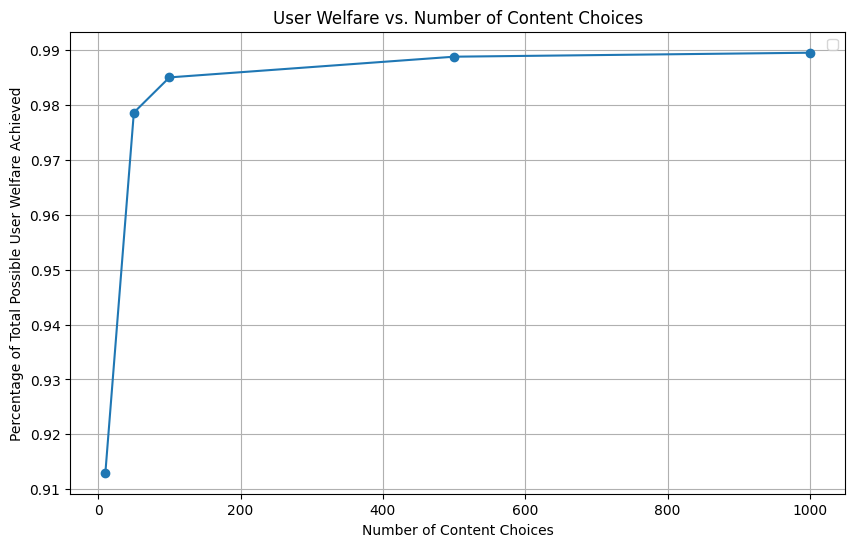

In [46]:
num_k = [10, 50, 100, 500, 1000]
k_arr = []  
for k in num_k:
  k_arr.append(run_alg(100, k)/(100*100))
print(k_arr)
plt.figure(figsize=(10, 6))
plt.plot(num_k, k_arr, marker='o')

plt.xlabel('Number of Content Choices') 
plt.ylabel('Percentage of Total Possible User Welfare Achieved')
plt.title('User Welfare vs. Number of Content Choices')
plt.legend()
plt.grid()
plt.show()

In [47]:
num_n = [5, 10, 50, 100, 500, 1000, 5000]
n_arr = []
for n in num_n:
    n_arr.append(run_alg(100, 100, 100, n)/(n*100))
print(n_arr)



[0.9759783983391032, 0.9852028007949115, 0.9835553256642142, 0.9863203280886353, 0.984000990009584, 0.984826699561725, 0.9864794096148028]


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


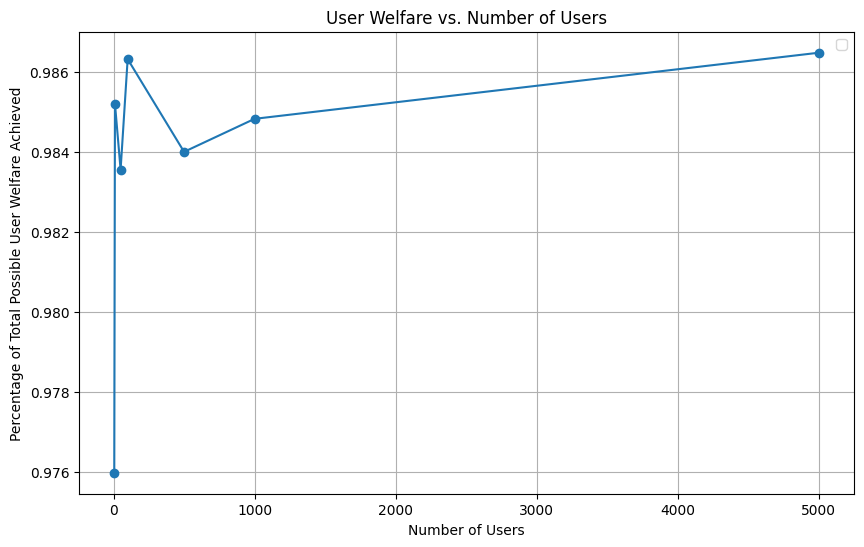

In [48]:
plt.figure(figsize=(10, 6))
plt.plot(num_n, n_arr, marker='o')

plt.xlabel('Number of Users') 
plt.ylabel('Percentage of Total Possible User Welfare Achieved')
plt.title('User Welfare vs. Number of Users')
plt.legend()
plt.grid()
plt.show()

In [50]:
num_m = [2, 5, 10, 50, 100]
m_arr = []
for m in num_m:
    m_arr.append(run_alg(100, 100, m)/(100*100))
print(m_arr)


[0.6855705493751837, 0.8450118767775054, 0.9080612490302028, 0.9763230451063082, 0.985926507573703]


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


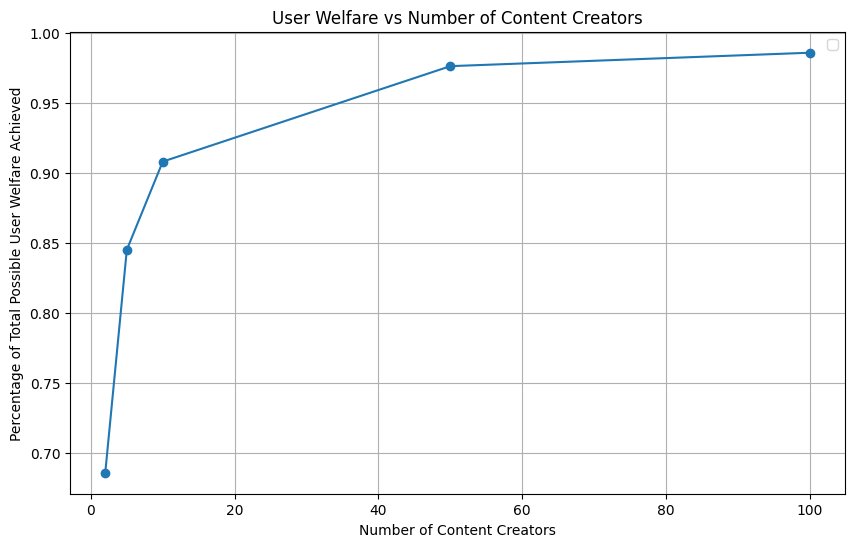

In [51]:
plt.figure(figsize=(10, 6))
plt.plot(num_m, m_arr, marker='o')

plt.xlabel('Number of Content Creators')
plt.ylabel('Percentage of Total Possible User Welfare Achieved')
plt.title('User Welfare vs Number of Content Creators')
plt.legend()
plt.grid()
plt.show()

In [59]:
run_alg(100, 4, 2, 80, Question.P2)

4500.742758860349

In [58]:
# question 2
scale = [5, 10, 20, 50]
results_p1 = []
results_p2 = []  
for s in scale:
    results_p1.append(run_alg(100, s*4, s*2, s*80, Question.P1)/(100*s*80)*100)
    results_p2.append(run_alg(100, s*4, s*2, s*80, Question.P2)/(100*s*80)*100)
print(results_p1)
print(results_p2)

TypeError: cannot unpack non-iterable numpy.float64 object

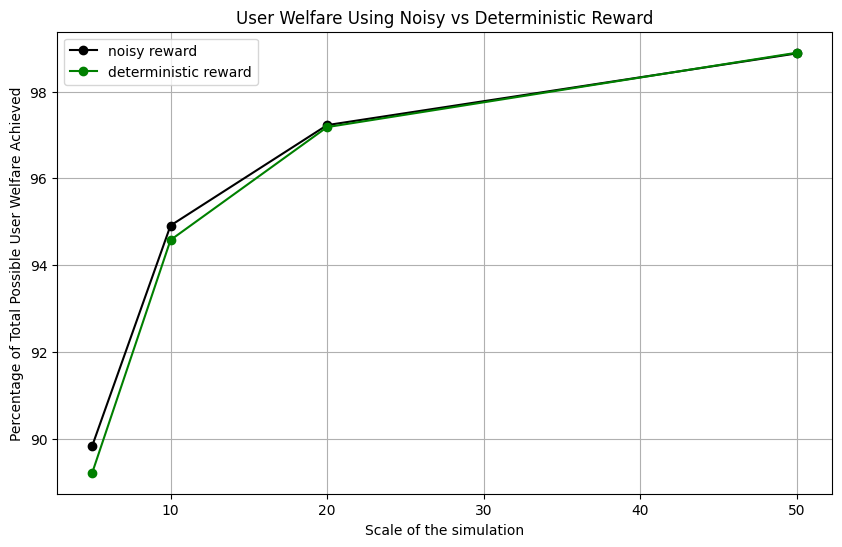

In [55]:
plt.figure(figsize=(10, 6))
plt.plot(scale, results_p2, marker='o', color='black', label='noisy reward')
plt.plot(scale, results_p1, marker='o', color='green', label='deterministic reward')

plt.xlabel('Scale of the simulation') 
plt.ylabel('Percentage of Total Possible User Welfare Achieved')
plt.title('User Welfare Using Noisy vs Deterministic Reward')
plt.legend()
plt.grid()
plt.show()

[89.60039665187506, 94.67286681574173, 97.30625695738146, 98.89085258549018]
[49.420234890926196, 50.006307759091364, 49.985597173203324, 49.956235967078925]


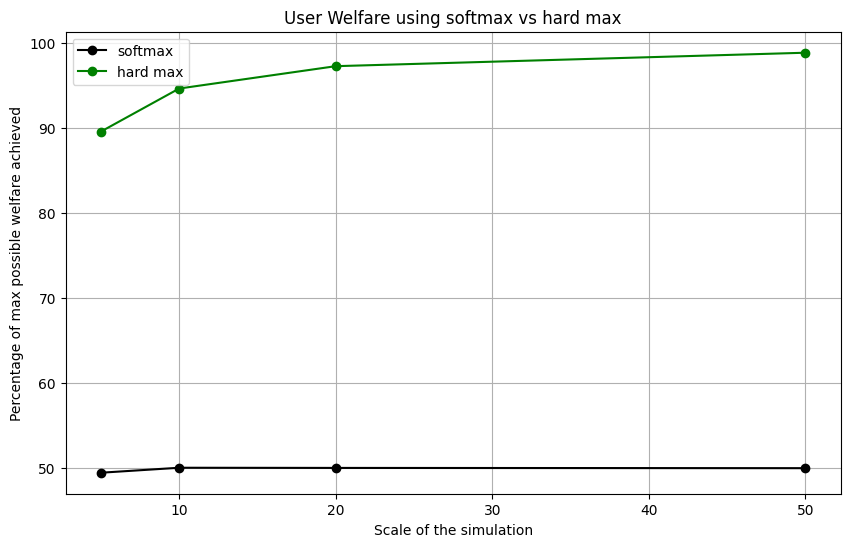

In [42]:
# question 3
scale = [5, 10, 20, 50]
results_p1 = []
results_p3 = []  
for s in scale:
    results_p1.append(run_alg(100, s*4, s*2, s*80, Question.P1)/(100*s*80)*100)
    results_p3.append(run_alg(100, s*4, s*2, s*80, Question.P3)/(100*s*80)*100)
print(results_p1)
print(results_p3)
plt.figure(figsize=(10, 6))
plt.plot(scale, results_p3, marker='o', color='black', label='softmax')
plt.plot(scale, results_p1, marker='o', color='green', label='hard max')

plt.xlabel('Scale of the simulation') 
plt.ylabel('Percentage of max possible welfare achieved')
plt.title('User Welfare using softmax vs hard max')
plt.legend()
plt.grid()
plt.show()